<a href="https://colab.research.google.com/github/ArthAgrawal/Digit_Classifier/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Tensorflow 2.0
import tensorflow as tf

# other packages
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11490434/11490434 [==============================] - 1s 0us/step


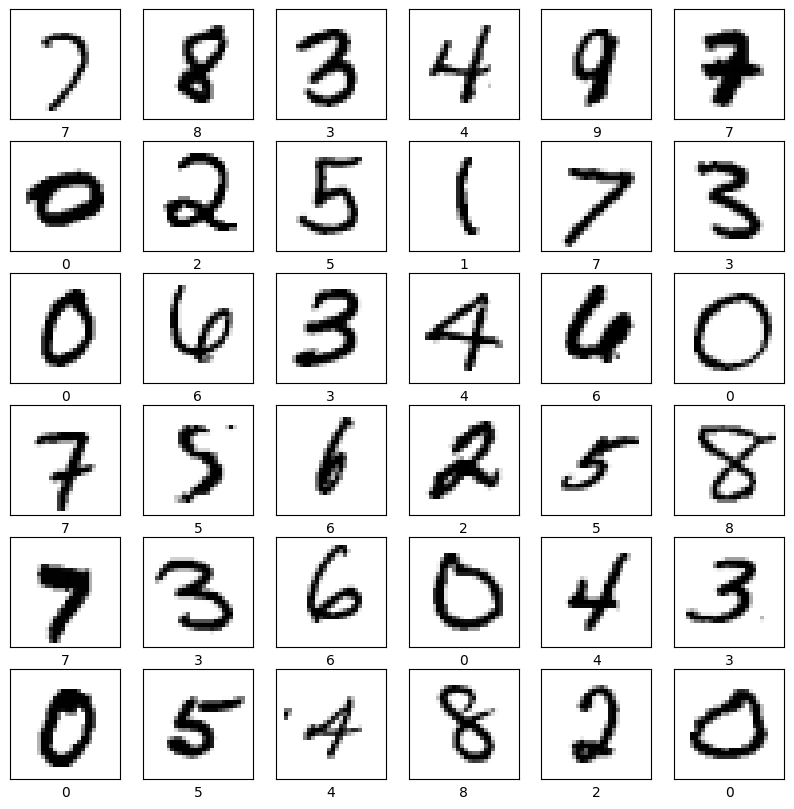

In [4]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [5]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # Define the first convolutional layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

        # Define the first max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

        # Define the second max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification probabilities
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())


1/1 [==============================] - 2s 2s/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense

In [6]:
# Define the compile operation with your optimizer and learning rate of choice
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [7]:
cnn_model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.1264 - accuracy: 0.9608 - val_loss: 0.0491 - val_accuracy: 0.9845
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0344 - val_accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0345 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0345 - val_accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.0362 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0309 - val_accurac

In [8]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0365 - accuracy: 0.9917
Test accuracy: 0.9916999936103821


In [9]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [10]:
predictions[0]

array([1.2971585e-18, 1.6861641e-13, 5.4783390e-11, 3.6241428e-13,
       4.4834314e-12, 3.7907084e-17, 2.7550711e-22, 1.0000000e+00,
       1.1195282e-15, 5.9163210e-13], dtype=float32)

In [11]:
# Get the model's prediction probabilities for the first image in the test dataset
prediction = cnn_model.predict(test_images[[0]])

# Find the index of the class with the highest probability
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)


1/1 [==============================] - 0s 33ms/step
Predicted digit: 7


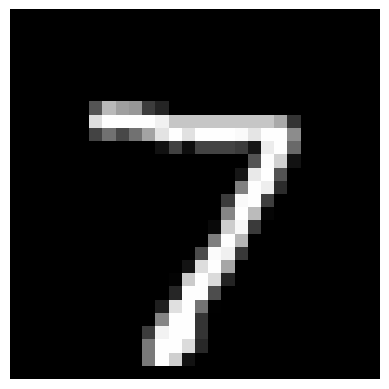

In [12]:
import matplotlib.pyplot as plt

# Plot the first image in the test dataset
plt.figure()
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()


Label of this digit is: 7


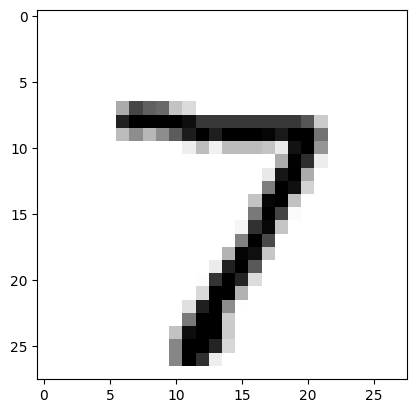

In [13]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

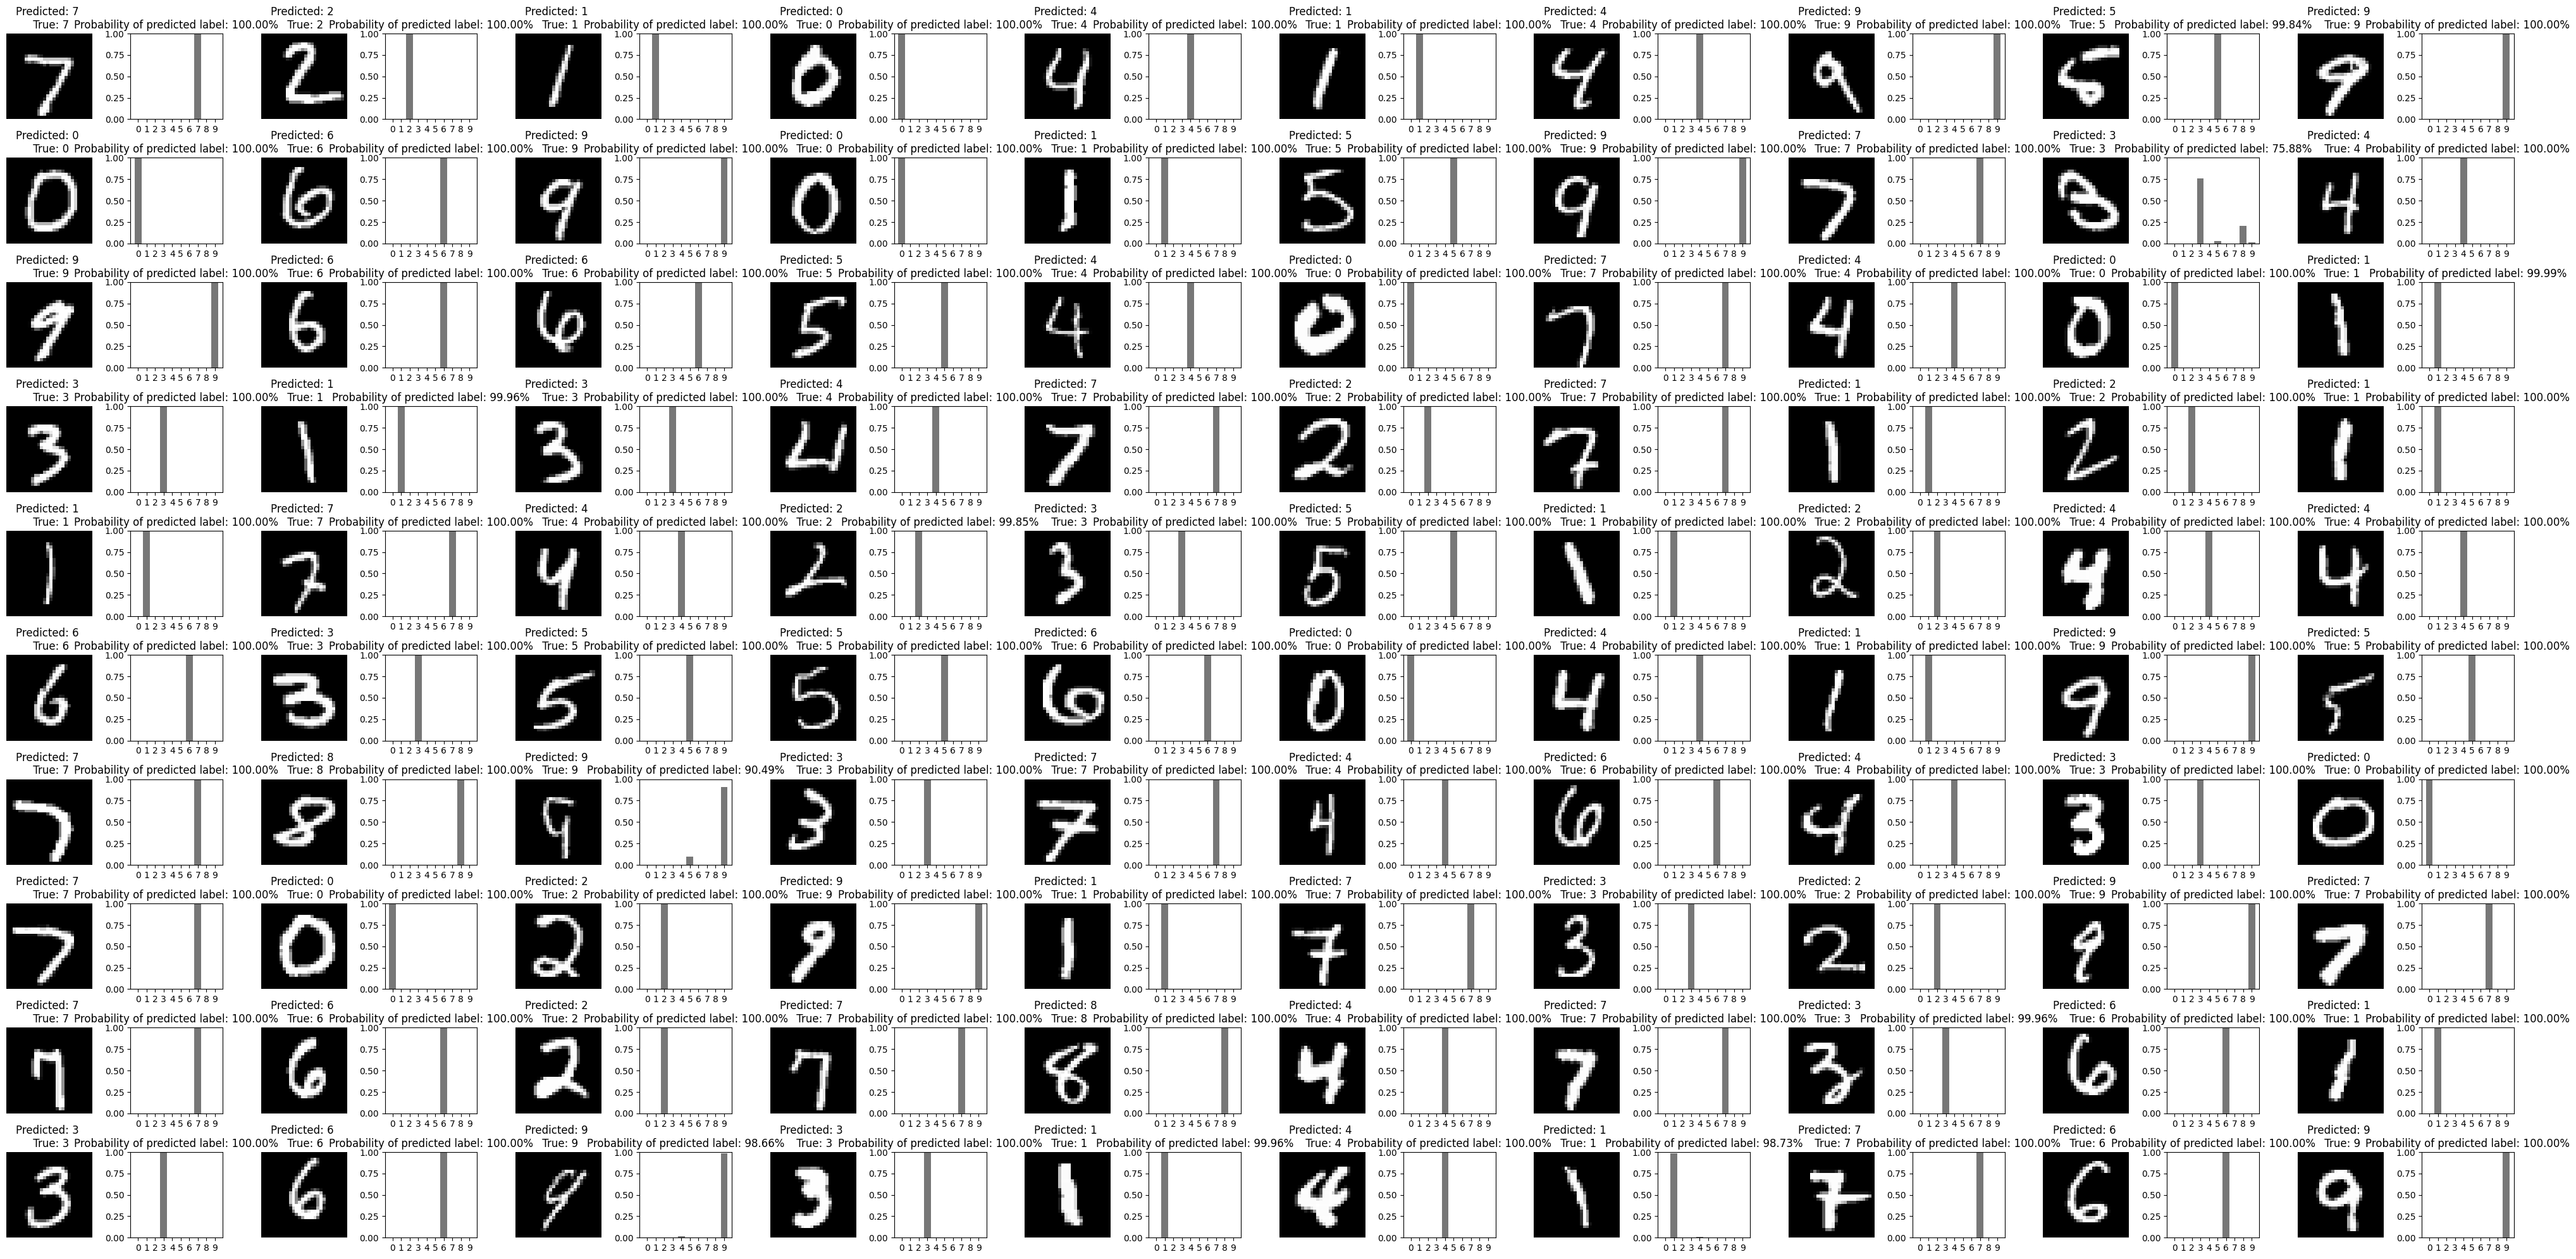

In [14]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 10
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Predicted: {} \n True: {}".format(np.argmax(predictions[i]), test_labels[i]))

    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.bar(range(10), predictions[i], color="#777777")
    plt.xticks(range(10))
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions[i])
    plt.title("Probability of predicted label: {:.2f}%".format(predictions[i][predicted_label]*100))

plt.tight_layout()
plt.show()


In [16]:
# Save the entire model to a file in the new format
cnn_model.save('cnn_model.keras')


In [17]:
from google.colab import files
files.download('cnn_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Whenever the model needs to be accessed again, run this code, it'll load the trained model, no need to run the whole code again

# Step 1: Upload the Saved Model File
from google.colab import files
uploaded = files.upload()

# Step 2: Import Necessary Libraries
import tensorflow as tf
import numpy as np

# Step 3: Load the Uploaded Model
loaded_model = tf.keras.models.load_model('cnn_model.keras')

# Print the summary to confirm it's loaded correctly
print(loaded_model.summary())

# Step 4: Load and Preprocess the MNIST Data
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

# Step 5: Evaluate and Use the Model
test_loss, test_acc = loaded_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

predictions = loaded_model.predict(test_images)
predicted_digit = np.argmax(predictions[0])
print("Predicted digit:", predicted_digit)
